#### Data Processing with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###### IN CASE OF PROBLEMS IMPORTING PACKAGES


In [ ]:
# SOLUTION A: select this cell and type Shift-Enter to execute the code below.

%conda install xlrd pandas seaborn

# Now restart the kernel (Menu -> Kernel -> Restart Kernel)

In [ ]:
# SOLUTION B: select this cell and type Shift-Enter to execute the code below.

%pip install xlrd pandas seaborn

# Now restart the kernel (Menu -> Kernel -> Restart Kernel)

<hr>

Run the following cell to rebuild the three `DataFrames`:

In [15]:
# countries
countries = pd.read_excel(
    "../assets/data_geographies_v1.xlsx", sheet_name="list-of-countries-etc"
)

# co2
data = pd.read_csv("../assets/yearly_co2_emissions_1000_tonnes.csv")
co2 = data.melt(id_vars=["country"], var_name="year", value_name="kt")
co2.dropna(inplace=True)
co2["year"] = co2["year"].astype(int)

# stats97
data = pd.read_csv("../assets/stats_1997.csv", header=None)
df = data[0].str.split("-", expand=True)
df.columns = ["geo", "statistic"]
df["value"] = data[1]
stats97 = df.pivot(index="geo", columns="statistic", values="value")


# 5. Manipulating Data

In this notebook, we will look at some more of pandas's data-handling tools.

***
## 5.1 Joining tables

To compare emissions between countries in a fair way, it would make sense to convert them to a per-capita basis. 
Let's start with the figures for 1997 to see how this can be done.

First we will make a new dataframe containing only the 1997 emissions:

In [16]:
co2_1997 = co2.query("year==1997")
co2_1997


,country,year,kt
47232,Afghanistan,1997,1100.0
47233,Albania,1997,1540.0
47234,Algeria,1997,87300.0
47235,Andorra,1997,466.0
47236,Angola,1997,7380.0
...,...,...,...
47419,Venezuela,1997,134000.0
47420,Vietnam,1997,45100.0
47421,Yemen,1997,13400.0
47422,Zambia,1997,2390.0


However, the population data is not yet in the co2 dataframe, so we will need to look it up from another dataframe by matching the country name. 

This type of **relational data**, where information must be collected from multiple tables, requires careful handling to make sure that rows in different tables are correctly associated with each other. The country name acts as a **key** to unlock the correct data from the associated table.

The relevant population data is in the stats97 table: 

In [17]:
stats97


statistic,gdp,pop
geo,,
afg,NaN,18400000.0
ago,2.570000e+10,15100000.0
alb,5.470000e+09,3090000.0
and,2.400000e+09,64300.0
are,1.730000e+11,2700000.0
...,...,...
wsm,4.330000e+08,172000.0
yem,1.740000e+10,16400000.0
zaf,2.490000e+11,43700000.0


However, this is indexed by the `geo` code, rather than the `country` name that we find in `co2_1997`. Fortunately, the `countries` table contains both:

In [18]:
countries.head()


,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


Taking the `co2_1997` data, we apply a `join()` to relate its `country` variable to the `name` variable in `countries`.

To do this, we need to set these columns as the index in each table

In [19]:
co2_1997.set_index("country")

,year,kt
country,,
Afghanistan,1997,1100.0
Albania,1997,1540.0
Algeria,1997,87300.0
Andorra,1997,466.0
Angola,1997,7380.0
...,...,...
Venezuela,1997,134000.0
Vietnam,1997,45100.0
Yemen,1997,13400.0


In [20]:
countries.set_index("name")

,geo,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
name,,,,,,,,,,
Afghanistan,afg,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
Albania,alb,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
Algeria,dza,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
Andorra,and,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
Angola,ago,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income
...,...,...,...,...,...,...,...,...,...,...
Vietnam,vnm,asia,east_asia_pacific,east_asia_pacific,g77,16.16667,107.83333,1977-09-20,East Asia & Pacific,Lower middle income
Yemen,yem,asia,asia_west,middle_east_north_africa,g77,15.50000,47.50000,1947-09-30,Middle East & North Africa,Lower middle income
Zambia,zmb,africa,africa_sub_saharan,sub_saharan_africa,g77,-14.33333,28.50000,1964-12-01,Sub-Saharan Africa,Lower middle income


In [21]:
a = co2_1997.set_index("country")
b = countries.set_index("name")
c = a.join(b)
c.head()


,year,kt,geo,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
country,,,,,,,,,,,,
Afghanistan,1997,1100.0,afg,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
Albania,1997,1540.0,alb,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
Algeria,1997,87300.0,dza,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
Andorra,1997,466.0,and,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
Angola,1997,7380.0,ago,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


For every row in the table `a`, `join()` tries to match its index with a row index in `b`. 
The resulting table imports the additional columns from the `countries` tibble, so now we can associate each `geo` code with the correct CO2 emissions.

`join()` is just one of several pandas functions for working with relational data.


#### Exercise {-}

Use another `join()` to connect `c` to `stats97`.

In [22]:
stats97

statistic,gdp,pop
geo,,
afg,NaN,18400000.0
ago,2.570000e+10,15100000.0
alb,5.470000e+09,3090000.0
and,2.400000e+09,64300.0
are,1.730000e+11,2700000.0
...,...,...
wsm,4.330000e+08,172000.0
yem,1.740000e+10,16400000.0
zaf,2.490000e+11,43700000.0


In [35]:
stats97_joint = stats97.join(c.reset_index().set_index("geo"))

#### Exercise {-}

Calculate the per-capita emissions for 1997 as a new column and plot these on a histogram.

In [36]:
stats97_joint["kt_pp"] = stats97_joint["kt"] / stats97_joint["pop"]
stats97_joint

,gdp,pop,country,year,kt,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017",kt_pp
geo,,,,,,,,,,,,,,,
afg,NaN,18400000.0,Afghanistan,1997.0,1100.0,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income,0.000060
ago,2.570000e+10,15100000.0,Angola,1997.0,7380.0,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income,0.000489
alb,5.470000e+09,3090000.0,Albania,1997.0,1540.0,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income,0.000498
and,2.400000e+09,64300.0,Andorra,1997.0,466.0,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income,0.007247
are,1.730000e+11,2700000.0,United Arab Emirates,1997.0,41600.0,asia,asia_west,middle_east_north_africa,g77,23.75000,54.50000,1971-12-09,Middle East & North Africa,High income,0.015407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wsm,4.330000e+08,172000.0,Samoa,1997.0,128.0,asia,east_asia_pacific,east_asia_pacific,g77,-13.80000,-172.13333,1976-12-15,East Asia & Pacific,Upper middle income,0.000744
yem,1.740000e+10,16400000.0,Yemen,1997.0,13400.0,asia,asia_west,middle_east_north_africa,g77,15.50000,47.50000,1947-09-30,Middle East & North Africa,Lower middle income,0.000817
zaf,2.490000e+11,43700000.0,South Africa,1997.0,386000.0,africa,africa_sub_saharan,sub_saharan_africa,g77,-29.00000,24.00000,1945-11-07,Sub-Saharan Africa,Upper middle income,0.008833


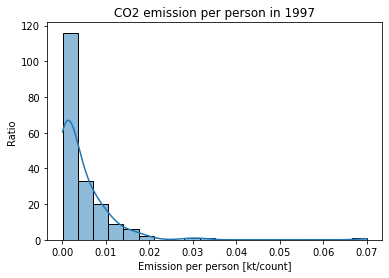

In [37]:
ax = sns.histplot(stats97_joint["kt_pp"], kde=True, bins=20)
ax.set_title("CO2 emission per person in 1997")
ax.set_xlabel("Emission per person [kt/count]")
ax.set_ylabel("Ratio")
plt.show()


#### Exercise {-}

The file `population_total.csv` contains (real or predicted) population data for each country for the years 1800-2100.

Write a workflow to construct a new DataFrame `co2_pp` containing the following columns:

* country
* year
* kt = total CO2 emissions (in kilotonnes)
* pop = total population
* t_pp = per-capita CO2 emissions (in tonnes)



In [54]:
# Load and tidy population data
data = pd.read_csv("../assets/population_total.csv")
data

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,71900000,71800000,71600000,71500000,71300000,71200000,71000000,70800000,70600000,70400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,1820000,1800000,1780000,1760000,1740000,1720000,1710000,1690000,1670000,1660000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,62800000,62800000,62800000,62800000,62800000,62800000,62700000,62700000,62600000,62600000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,64300,64200,64100,63900,63800,63700,63500,63400,63300,63100
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,156000000,158000000,160000000,162000000,164000000,166000000,167000000,169000000,171000000,173000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,718000,718000,718000,718000,718000,718000,718000,718000,718000,...,42500000,42500000,42400000,42300000,42200000,42100000,42000000,41900000,41800000,41600000
191,Vietnam,6550000,6550000,6550000,6550000,6550000,6550000,6550000,6550000,6550000,...,110000000,109000000,109000000,109000000,109000000,109000000,108000000,108000000,108000000,108000000
192,Yemen,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,...,54700000,54600000,54500000,54400000,54200000,54100000,54000000,53800000,53700000,53500000
193,Zambia,747000,747000,747000,747000,747000,747000,747000,747000,747000,...,84600000,85700000,86800000,87900000,89000000,90100000,91200000,92300000,93300000,94400000


In [55]:
data.isnull().values.sum()

0

In [57]:
population = data.melt(id_vars=["country"], var_name="year", value_name="pop")
population["year"] = population["year"].astype(int)
population


,country,year,pop
0,Afghanistan,1800,3280000
1,Albania,1800,410000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000
...,...,...,...
58690,Venezuela,2100,41600000
58691,Vietnam,2100,108000000
58692,Yemen,2100,53500000
58693,Zambia,2100,94400000


In [58]:
# Join tables etc
co2

,country,year,kt
182,United Kingdom,1751,9360.0
374,United Kingdom,1752,9360.0
566,United Kingdom,1753,9360.0
758,United Kingdom,1754,9370.0
950,United Kingdom,1755,9370.0
...,...,...,...
50683,Venezuela,2014,185000.0
50684,Vietnam,2014,167000.0
50685,Yemen,2014,22700.0
50686,Zambia,2014,4500.0


In [75]:
# Pandas calls it multi-index
co2_pp = (
    co2.set_index(["country", "year"])
    .join(population.set_index(["country", "year"]))
    .reset_index()
)
co2_pp["t_pp"] = co2_pp["kt"] / co2_pp["pop"] * 1e3
co2_pp = co2_pp.dropna()
co2_pp


,country,year,kt,pop,t_pp
72,Canada,1800,3.67,646000.0,0.005681
73,Germany,1800,796.00,22900000.0,0.034760
74,Poland,1800,407.00,9510000.0,0.042797
75,United Kingdom,1800,26700.00,12300000.0,2.170732
76,United States,1800,253.00,6800000.0,0.037206
...,...,...,...,...,...
16911,Venezuela,2014,185000.00,30700000.0,6.026059
16912,Vietnam,2014,167000.00,92500000.0,1.805405
16913,Yemen,2014,22700.00,26200000.0,0.866412
16914,Zambia,2014,4500.00,15600000.0,0.288462


***

## 5.2 Summarising data across groups

Cases often belong to distinct groups that we want to compare with each other in some way.


#### Exercise {-}

Using the output of the previous exercise and the `countries` dataframe, add columns for the `geo` code and the `eight_regions` grouping.

In [65]:
countries

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income
...,...,...,...,...,...,...,...,...,...,...,...
192,vnm,Vietnam,asia,east_asia_pacific,east_asia_pacific,g77,16.16667,107.83333,1977-09-20,East Asia & Pacific,Lower middle income
193,yem,Yemen,asia,asia_west,middle_east_north_africa,g77,15.50000,47.50000,1947-09-30,Middle East & North Africa,Lower middle income
194,zmb,Zambia,africa,africa_sub_saharan,sub_saharan_africa,g77,-14.33333,28.50000,1964-12-01,Sub-Saharan Africa,Lower middle income
195,zwe,Zimbabwe,africa,africa_sub_saharan,sub_saharan_africa,g77,-19.00000,29.75000,1980-08-25,Sub-Saharan Africa,Low income


In [72]:
countries[["name", "geo", "eight_regions"]]


,name,geo,eight_regions
0,Afghanistan,afg,asia_west
1,Albania,alb,europe_east
2,Algeria,dza,africa_north
3,Andorra,and,europe_west
4,Angola,ago,africa_sub_saharan
...,...,...,...
192,Vietnam,vnm,east_asia_pacific
193,Yemen,yem,asia_west
194,Zambia,zmb,africa_sub_saharan
195,Zimbabwe,zwe,africa_sub_saharan


In [78]:
x = co2_pp.set_index("country")
y = countries[["name", "geo", "eight_regions"]].set_index("name")
co2_pp = x.join(y).reset_index()
co2_pp


,index,year,kt,pop,t_pp,geo,eight_regions
0,Afghanistan,1949,14.7,7660000.0,0.001919,afg,asia_west
1,Afghanistan,1950,84.3,7750000.0,0.010877,afg,asia_west
2,Afghanistan,1951,91.7,7840000.0,0.011696,afg,asia_west
3,Afghanistan,1952,91.7,7930000.0,0.011564,afg,asia_west
4,Afghanistan,1953,106.0,8040000.0,0.013184,afg,asia_west
...,...,...,...,...,...,...,...
16839,Zimbabwe,2010,7780.0,14100000.0,0.551773,zwe,africa_sub_saharan
16840,Zimbabwe,2011,9560.0,14400000.0,0.663889,zwe,africa_sub_saharan
16841,Zimbabwe,2012,7790.0,14700000.0,0.529932,zwe,africa_sub_saharan
16842,Zimbabwe,2013,11700.0,15100000.0,0.774834,zwe,africa_sub_saharan


## Box plots

Let's look at the data for 2014 only. Here's a more complex visualisation of the data:

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


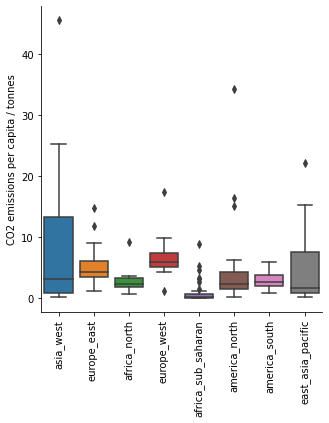

In [79]:
d = co2_pp.query("year==2014")
ax = sns.catplot("eight_regions", "t_pp", data=d, kind="box")
ax.set_axis_labels("", "CO2 emissions per capita / tonnes")
ax.set_xticklabels(rotation=90)


## groupby()

Pandas allows you to define groups of rows to construct summary statistics for each group:

In [82]:
grouped = co2_pp.groupby("eight_regions")
grouped

In [83]:
# Group-wise operations made easy
grouped.sum()

,year,kt,pop,t_pp
eight_regions,,,,
africa_north,999191,1.262820e+07,7.841969e+09,839.375500
africa_sub_saharan,5814579,2.665212e+07,3.137188e+10,1967.094507
america_north,3720946,4.284253e+08,3.577184e+10,7423.711558
america_south,2262196,3.638540e+07,1.995984e+10,1917.834949
asia_west,4667678,1.147488e+08,9.876572e+10,13280.810561
east_asia_pacific,4260578,2.984067e+08,1.356578e+11,7373.452857
europe_east,5203217,1.931920e+08,3.633558e+10,8468.981591
europe_west,6029725,3.065053e+08,5.499423e+10,14900.325870


##### *Exercise*

Plot the total global CO2 emissions for each year.


In [88]:
grouped_year = co2_pp.groupby("year")
df = grouped_year.sum().reset_index()
df

,year,kt,pop,t_pp
0,1800,28159.67,5.215600e+07,2.291176
1,1801,27950.67,5.263300e+07,2.250046
2,1802,36838.67,8.570100e+07,4.347313
3,1803,31497.67,5.350900e+07,2.477096
4,1804,34385.67,8.370700e+07,2.553400
...,...,...,...,...
210,2010,31578811.63,6.910096e+09,879.487900
211,2011,32807100.63,6.999311e+09,869.139561
212,2012,33414411.30,7.090571e+09,869.128026
213,2013,33572385.60,7.174107e+09,856.959391


<AxesSubplot:xlabel='year', ylabel='kt'>

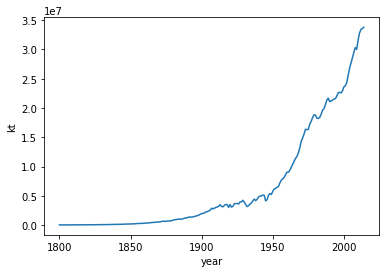

In [89]:
sns.lineplot(x="year", y="kt", data=df)

##### *Exercise*

Plot the yearly median per-capita CO2 emissions for the eight regions.


<AxesSubplot:xlabel='year'>

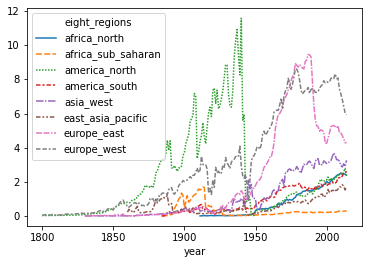

In [100]:
df = co2_pp.reset_index()[["year", "eight_regions", "t_pp"]].groupby(
    ["year", "eight_regions"]
)
# The unstack() stuff is quite awkward but it's just to get into the data format that pandas can interpret as multiple series
data = df.median().unstack().droplevel(0, 1)
sns.lineplot(data=data)


***